In [18]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [19]:
train_ids = pd.read_csv('train_semeval_parids-labels.csv')
test_ids = pd.read_csv('dev_semeval_parids-labels.csv')

train_ids = train_ids['par_id']
test_ids = test_ids['par_id']

In [20]:
test_data.head()

,par_id,art_id,keyword,country_code,text,label
0,4046,@@14767805,hopeless,us,We also know that they can benefit by receivin...,3
1,1279,@@7896098,refugee,ng,Pope Francis washed and kissed the feet of Mus...,4
2,8330,@@17252299,refugee,ng,Many refugees do n't want to be resettled anyw...,2
3,4063,@@3002894,in-need,ie,"Budding chefs , like "" Fred "" , "" Winston "" an...",4
4,4089,@@25597822,homeless,pk,"In a 90-degree view of his constituency , one ...",3


Text(0, 0.5, 'count')

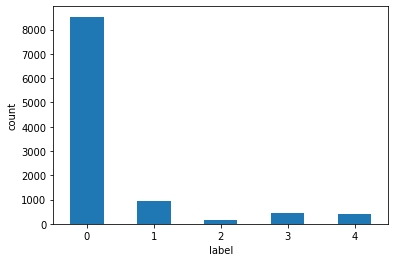

In [21]:
data = pd.read_csv('dontpatronizeme_pcl.tsv', sep='\t', header=None, names=['par_id', 'art_id', 'keyword', 'country_code', 'text', 'label'])

data.label.value_counts()
# plot the histogram for the discrete labels
plt.hist(data.label, bins=5, range=(0, 5), align='left', rwidth=0.5)
# set the x range to -0.5 to 4.5
plt.xlim(-0.5, 4.5)
plt.xlabel('label')
plt.ylabel('count')

In [22]:
data.head()

,par_id,art_id,keyword,country_code,text,label
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0
2,3,@@16584954,immigrant,ie,White House press secretary Sean Spicer said t...,0
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0
4,5,@@1494111,refugee,ca,""" Just like we received migrants fleeing El Sa...",0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10469 entries, 0 to 10468
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   par_id        10469 non-null  int64 
 1   art_id        10469 non-null  object
 2   keyword       10469 non-null  object
 3   country_code  10469 non-null  object
 4   text          10468 non-null  object
 5   label         10469 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 490.9+ KB


In [24]:
print("label 0 accounts {}".format(data[data['label'] == 0]['label'].count() / data.shape[0]))

label 0 accounts 0.8146909924539115


In [25]:

# map labels to 0 and 1(Non-PCL and PCL)
data['label'] = data['label'].apply(lambda x: 0 if x == 0 or x == 1 else 1)

In [26]:
data = data.drop('art_id', axis=1)
data = data.drop('keyword', axis=1)
data = data.drop('country_code', axis=1)

train_data = data[data['par_id'].isin(train_ids)]
test_data = data[data['par_id'].isin(test_ids)].set_index('par_id').loc[test_ids].reset_index()

train_data = train_data.drop('par_id', axis=1)
test_data = test_data.drop('par_id', axis=1)

# fill the missing values with empty string

train_data = train_data.fillna('" "')
test_data = test_data.fillna('" "')

# split the validation set from the training set
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

In [27]:
# save the data
train_data.to_csv('./datasets/train_data.csv', index=False)
val_data.to_csv('./datasets/val_data.csv', index=False)
test_data.to_csv('./datasets/test_data.csv', index=False)

---

In [28]:
final_pred = pd.read_csv('task4_test.tsv', sep='\t', header=None, names=['par_id', 'art_id', 'keyword', 'country_code', 'text'])

In [29]:
# only keep the text column
final_pred = final_pred.drop(['par_id', 'art_id', 'keyword', 'country_code'], axis=1)
final_pred = final_pred.fillna('" "')

In [30]:
final_pred.to_csv('./datasets/final_pred.csv', index=False)